In [1]:
# Import libraries
import os, fnmatch
import IPython.display as ipd
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display

In [2]:
# Importing datasets from files to array
labels = []
files = []

chords = ['_As_maj', '_As_min', '_A_maj', '_A_min', '_B_maj', '_B_min', '_Cs_maj', '_Cs_min', '_C_maj',
          '_C_min', '_Ds_maj', '_Ds_min', '_D_maj', '_D_min', '_E_maj', '_E_min', '_Fs_maj', '_Fs_min',
          '_F_maj', '_F_min', '_G_maj', '_G_min', '_Gs_maj', '_Gs_min']

#chords = ['_maj', '_min']

#chords = ['_As', '_A', '_B', '_Cs', '_C', '_Ds', '_D', '_E', '_Fs', '_F', '_Gs', '_G']


# Load violin data and append a new violin label & file path 
# for each '.wav' file found 

path='Datasets/duplicatedCombinedChords/'
for file in os.listdir(path):
    if fnmatch.fnmatch(file, '*.wav'):
        files.append(path+file)
        #print(file)
for file in files:
    for chord in chords:
        if fnmatch.fnmatchcase(file, '*'+chord+'*'):
            labels.append(chord)
            break
    else:
        labels.append('other')        
#files
#labels

In [3]:
# Encode target values found in 'labels' array
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(labels)
Y = le.transform(labels)
Y

array([11, 12, 11, 11, 13, 15, 16, 21, 22,  5, 16,  6,  0, 23, 15,  6, 16,
        3, 20, 17,  7, 20,  8, 12,  3, 19,  5, 22, 21, 14,  9, 20, 13, 15,
       20,  6, 10,  9, 18,  6, 12, 22,  0, 21,  9,  4,  5,  3,  1,  7,  8,
       23,  1, 16, 21, 10, 19, 22, 14,  8, 20,  0,  1,  5, 22, 13, 22, 14,
       10,  7, 21,  5,  5,  7,  2, 11, 16,  1, 16, 23, 14, 23,  3, 18, 17,
        1, 11,  3, 12, 20,  4,  6,  8, 13, 10,  0, 18,  4,  2, 22,  7,  0,
       13,  2,  0,  8, 10,  2, 14,  7,  1, 15, 16, 15,  4, 21, 11, 23, 17,
       23,  5, 13, 21,  1, 12,  4, 18,  8, 11, 17, 14,  3, 15,  6, 17,  9,
       19, 20, 17,  2, 23, 19, 11, 10, 15,  3, 18, 22, 15,  7, 12, 14,  4,
       20,  2, 19, 18,  7, 17, 10, 21, 18,  9,  3, 13,  9, 18,  4,  1,  0,
       19,  2,  9,  4, 12,  8,  0, 16, 12, 13, 14, 19,  2, 19,  5,  6,  6,
        8,  9, 23, 17, 10])

In [4]:
# Load files from 'files' array & extract MFCC data
X = []
for file in (files):
    data, sr = librosa.load(file)
    if len(data) is None:  # Catch error for incorrect file loading
        print("Error loading")
        break
    stft_data = librosa.stft(data, n_fft=2048, hop_length=512)   
    spec_data = np.abs(stft_data) ** 2
    features = np.mean(spec_data,1)
    X.append(features)  # Append MFCC audio features to X data array

In [5]:
# Split the X and Y data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [6]:
# Data scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() 
scaled_X_train  = sc.fit_transform(X_train)
scaled_X_test = sc.fit_transform(X_test)

## Neural Network model

In [7]:
# Apply the Neural Netwrok learning model and train it
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(max_iter=10000)
model.fit(scaled_X_train, Y_train)

# Get model predictions
pred_Y_train = model.predict(scaled_X_train)
pred_Y_test = model.predict(scaled_X_test)

# Evaluate the model
scaledTrainScore="Scaled train score = {:0.3f}".format(model.score(scaled_X_train, Y_train))
scaledTestScore="Scaled test score = {:0.3f}".format(model.score(scaled_X_test, Y_test))

In [8]:
# Basic model accuracy
print(scaledTrainScore)
print(scaledTestScore)

Scaled train score = 1.000
Scaled test score = 0.793


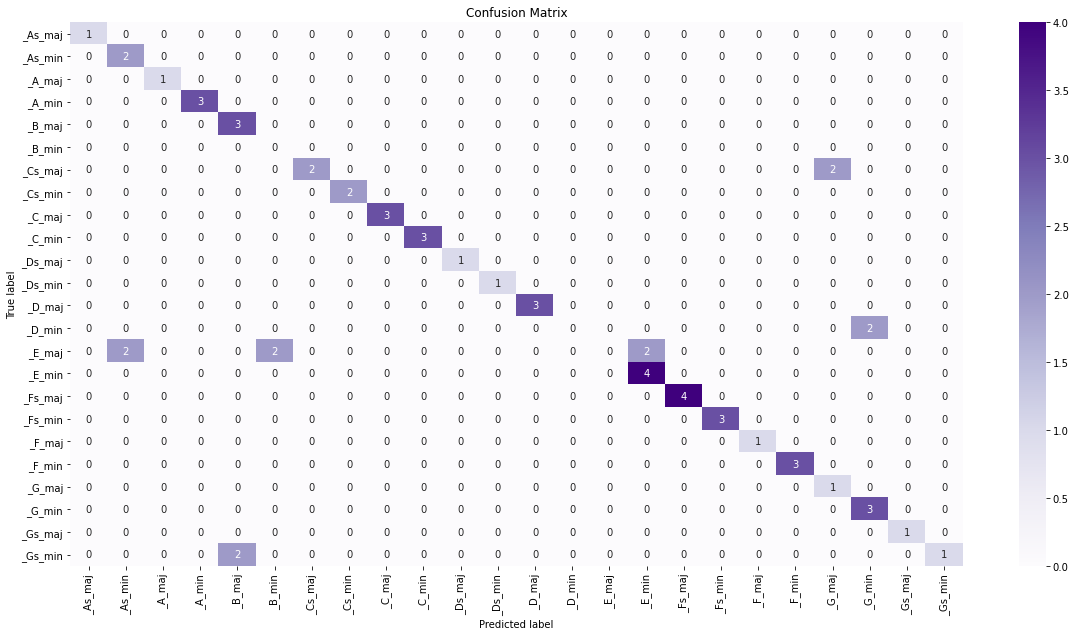

In [9]:
# Plot Confusion Matrix
from cf_matrix import make_confusion_matrix  # Import library
from sklearn.metrics import confusion_matrix
cfm = confusion_matrix(Y_test, pred_Y_test)  # Creating a simple confusion matrix
labels = ['True Negative','False Positive','False Negative','True Positive']  # set data labels
categories = chords # set target categories
make_confusion_matrix(cfm,  # function to format confusion matrix
                      title='Confusion Matrix',
                      group_names=labels,
                      categories=categories,
                      sum_stats=False,
                      percent=False,
                      cmap='Purples',
                      figsize=(20,10))


In [10]:
# Apply the Logistical regression learning model and train it
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(scaled_X_train, Y_train)  # Train the model using the training data

# Get model predictions
pred_Y_train = model.predict(scaled_X_train)
pred_Y_test = model.predict(scaled_X_test)

# Evaluate the model
scaledTrainScore="Scaled train score = {:0.3f}".format(model.score(scaled_X_train, Y_train))
scaledTestScore="Scaled test score = {:0.3f}".format(model.score(scaled_X_test, Y_test))

In [11]:
# Basic model accuracy
print(scaledTrainScore)
print(scaledTestScore)

Scaled train score = 1.000
Scaled test score = 0.793


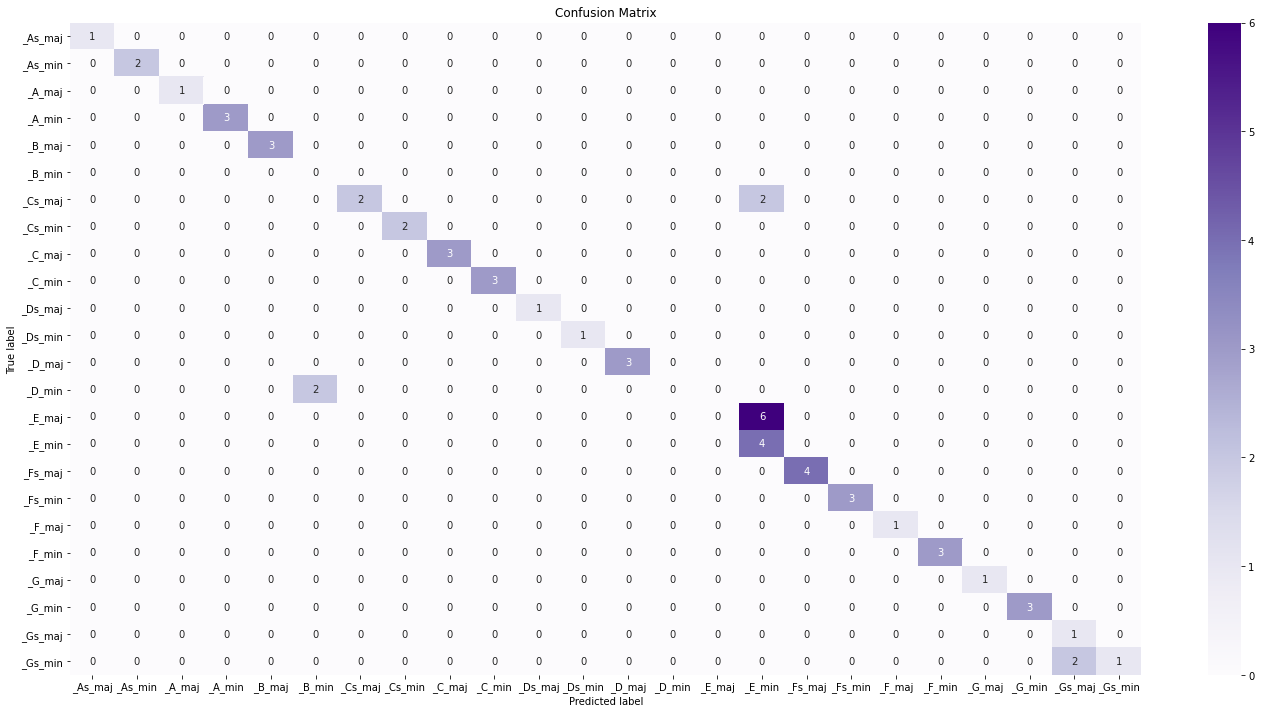

In [12]:
# Plot Confusion Matrix
from cf_matrix import make_confusion_matrix  # Import library
from sklearn.metrics import confusion_matrix
cfm = confusion_matrix(Y_test, pred_Y_test)  # Creating a simple confusion matrix
labels = ['True Negative','False Positive','False Negative','True Positive']  # set data labels
categories = chords # set target categories
make_confusion_matrix(cfm,  # function to format confusion matrix
                      title='Confusion Matrix',
                      group_names=labels,
                      categories=categories,
                      sum_stats=False,
                      percent=False,
                      cmap='Purples',
                      figsize=(24,12))
